In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AvgPool2D, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

tf.test.gpu_device_name()

Mounted at /content/gdrive


'/device:GPU:0'

In [ ]:
location = "/content/gdrive/My Drive/Colab Notebooks/MultiDigit_CNN/"

In [ ]:
train_data0 = np.load(location + 'Data/data0.npy')
train_lab0 = np.load(location + 'Label/lab0.npy')

train_data1 = np.load(location + 'Data/data1.npy')
train_lab1 = np.load(location + 'Label/lab1.npy')

train_data2 = np.load(location + 'Data/data2.npy')
train_lab2 = np.load(location + 'Label/lab2.npy')

In [ ]:
train_data = np.vstack((train_data0, train_data1, train_data2))
train_lab = np.hstack((train_lab0, train_lab1, train_lab2))
print("Original dataset sizes:", train_data.shape, train_lab.shape)

Original dataset sizes: (30000, 40, 168) (30000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_lab, test_size=0.2, random_state=42)

In [ ]:
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train Test split:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train Test split: (24000, 40, 168, 1) (6000, 40, 168, 1) (24000,) (6000,)


In [ ]:
print("Label counts y_train:", np.unique(y_train, return_counts=True))

Label counts y_train: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=uint8), array([   1,    8,   29,   42,  101,  172,  228,  308,  429,  575,  694,
        862, 1065, 1145, 1285, 1452, 1512, 1575, 1664, 1569, 1461, 1386,
       1260, 1093,  923,  872,  663,  507,  360,  271,  194,  126,   86,
         49,   25,    6,    2]))


In [ ]:
#set number of categories
num_category = 37
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
print("One-hot encoded label size:", y_train.shape, y_test.shape)

One-hot encoded label size: (24000, 37) (6000, 37)


In [ ]:
######################## SIMPLE CNN WITH FCs ###############################
# model = Sequential()
# model.add(Conv2D(8, kernel_size=(3, 3), padding = "same", activation='relu', input_shape=input_shape))
# model.add(Conv2D(8, (3, 3), activation='relu', padding = "same"))
# model.add(MaxPool2D(pool_size=(2, 2), strides = 2))
# model.add(Conv2D(16, kernel_size=(3, 3), padding = "same", activation='relu'))
# model.add(Conv2D(16, (3, 3), activation='relu', padding = "same"))
# model.add(MaxPool2D(pool_size=(2, 2), strides = 2))
# model.add(Conv2D(32, kernel_size=(3, 3), padding = "same", activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu', padding = "same"))
# model.add(Conv2D(128, (3, 3), activation='relu', padding = "same"))
# model.add(MaxPool2D(pool_size=(2, 2), strides = 2))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(num_category*2, activation='relu'))
# model.add(Dense(num_category, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

######################## YANN LECUN's LENET-5 (Modified) ############################
# model = Sequential()
# model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=input_shape, activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(num_category, activation='softmax'))

###################### SIMILAR ARCHITECTURE GOT 99.75% on MNIST #########################
model= Sequential()
#-----------------#
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#-----------------#
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#-----------------#
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#-----------------#
model.add(Flatten())
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_category*2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_category, activation='softmax'))

################# COMPILE THE MODEL ######################
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 38, 166, 32)       320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 38, 166, 32)       128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 164, 32)       9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 36, 164, 32)       128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 82, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 80, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 80, 64)       

In [ ]:
batch_size = 100
num_epoch = 5
model_log = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
240/240 [==============================] - 13s 55ms/step - loss: 0.5365 - accuracy: 0.7895 - val_loss: 2.7547 - val_accuracy: 0.4437
Epoch 2/5
240/240 [==============================] - 13s 55ms/step - loss: 0.4413 - accuracy: 0.8268 - val_loss: 1.4738 - val_accuracy: 0.7172
Epoch 3/5
240/240 [==============================] - 13s 55ms/step - loss: 0.4153 - accuracy: 0.8373 - val_loss: 1.5738 - val_accuracy: 0.6910
Epoch 4/5
240/240 [==============================] - 13s 55ms/step - loss: 0.4165 - accuracy: 0.8373 - val_loss: 1.5228 - val_accuracy: 0.7092
Epoch 5/5
240/240 [==============================] - 13s 55ms/step - loss: 0.4046 - accuracy: 0.8490 - val_loss: 1.7427 - val_accuracy: 0.6590


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Model Metrics\n%s: %.2f%%, %s: %.2f" %(model.metrics_names[1], score[1]*100, model.metrics_names[0], score[0]))

Model Metrics
accuracy: 74.38%, loss: 1.02


<Figure size 432x288 with 0 Axes>

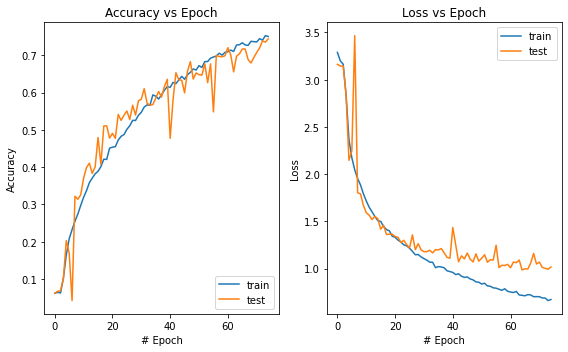

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.savefig(location + "Plots3.png")

In [ ]:
choice = int(input("Do you want to store this model?? Enter 1 for Yes and 0 for No: "))
if(choice == 1):
  
  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # Save the model
  # serialize model to JSON
  model_json = model.to_json()
  with open(file_name + ".json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(file_name +".h5")
  print("Saved model to disk")

Do you want to store this model?? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 96
Enter validation accuracy rounded to the nearest integer: 75
Saved model to disk


In [ ]:
def check_answers(trained_model, X, Y, start):
  
  label_preds = trained_model.predict(X)
  f = plt.figure(figsize=(20,4))
  axs1 = f.add_subplot(241)
  axs2 = f.add_subplot(242)
  axs3 = f.add_subplot(243)
  axs4 = f.add_subplot(244)
  axs5 = f.add_subplot(245)
  axs6 = f.add_subplot(246)
  axs7 = f.add_subplot(247)
  axs8 = f.add_subplot(248)
  axs1.imshow(X[start, :, :, 0])
  axs1.set_title('Corr: ' + str(np.argmax(Y[start])) + " Pred: " + str(np.argmax(label_preds[start])))
  axs2.imshow(X[start+1, :, :, 0])
  axs2.set_title('Corr: ' + str(np.argmax(Y[start+1])) + " Pred: " + str(np.argmax(label_preds[start+1])))
  axs3.imshow(X[start+2, :, :, 0])
  axs3.set_title('Corr: ' + str(np.argmax(Y[start+2])) + " Pred: " + str(np.argmax(label_preds[start+2])))
  axs4.imshow(X[start+3, :, :, 0])
  axs4.set_title('Corr: ' + str(np.argmax(Y[start+3])) + " Pred: " + str(np.argmax(label_preds[start+3])))
  axs5.imshow(X[start+4, :, :, 0])
  axs5.set_title('Corr: ' + str(np.argmax(Y[start+4])) + " Pred: " + str(np.argmax(label_preds[start+4])))
  axs6.imshow(X[start+5, :, :, 0])
  axs6.set_title('Corr: ' + str(np.argmax(Y[start+5])) + " Pred: " + str(np.argmax(label_preds[start+5])))
  axs7.imshow(X[start+6, :, :, 0])
  axs7.set_title('Corr: ' + str(np.argmax(Y[start+6])) + " Pred: " + str(np.argmax(label_preds[start+6])))
  axs8.imshow(X[start+7, :, :, 0])
  axs8.set_title('Corr: ' + str(np.argmax(Y[start+7])) + " Pred: " + str(np.argmax(label_preds[start+7])))

def check_metrics(model, X_test, y_test):  

  y_pred = np.argmax(model.predict(X_test),axis = 1)
  y_true = np.argmax(y_test, axis=1)
  print('##############  Confusion Matrix  ##############')
  print()
  np.set_printoptions(threshold=np.inf)
  print(confusion_matrix(y_true, y_pred))
  np.set_printoptions(threshold=100)
  print()
  print('##############  Classification Report  ##############')
  print()
  target_names = [str(i) for i in range(37)]
  print(classification_report(y_true, y_pred, target_names=target_names))

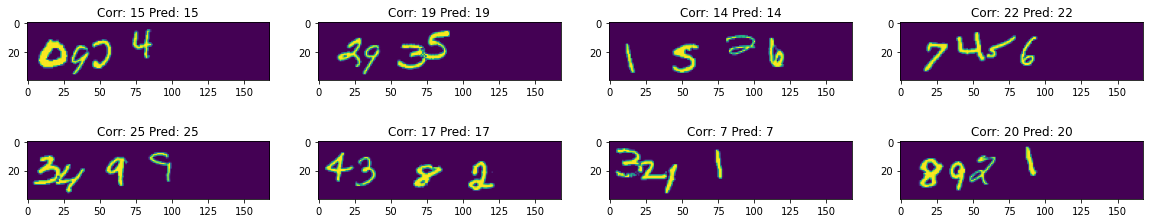

In [ ]:
check_answers(model, X_test, y_test, 576)

In [ ]:
check_metrics(model, X_test, y_test)

##############  Confusion Matrix  ##############

[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   1   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   4  24   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  23   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Do you want to load any saved model? Enter 1 for Yes and 0 for No: 1
Enter train accuracy rounded to the nearest integer: 93
Enter validation accuracy rounded to the nearest integer: 80
Loaded model from disk
Loaded Model Metrics
accuracy: 79.65%, loss: 1.05
##############  Confusion Matrix  ##############

[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   7   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   8   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  28   0   0   0   0   0   0   0   0   0   0   0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


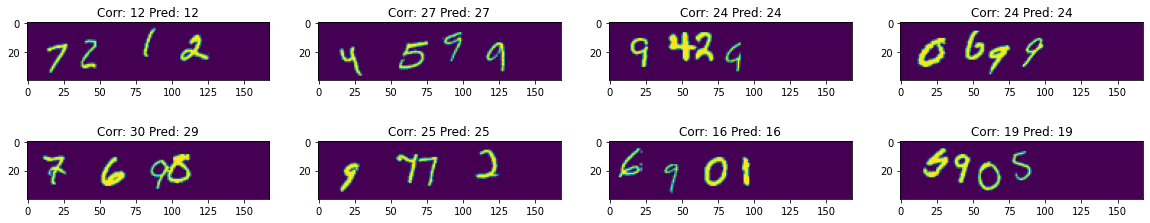

In [ ]:
choice = int(input("Do you want to load any saved model? Enter 1 for Yes and 0 for No: "))
if(choice == 1):

  acc_tr = int(input("Enter train accuracy rounded to the nearest integer: "))
  acc_va = int(input("Enter validation accuracy rounded to the nearest integer: "))
  file_name = location + 'model_' + str(acc_tr) + "_" + str(acc_va)

  # load json and create model
  json_file = open(file_name + '.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(file_name + ".h5")
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
  score = loaded_model.evaluate(X_test, y_test, verbose=0)
  print("Loaded Model Metrics\n%s: %.2f%%, %s: %.2f" % (loaded_model.metrics_names[1], score[1]*100, loaded_model.metrics_names[0], score[0]))

  check_answers(loaded_model, X_test, y_test, 5245)
  check_metrics(loaded_model, X_test, y_test)